In [1]:
import pyodbc
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as skl
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

df = pd.read_csv("Data_Extraction_&_Cleaning\data\Postgres\counts_&_income.csv")

columns = df.columns.tolist()

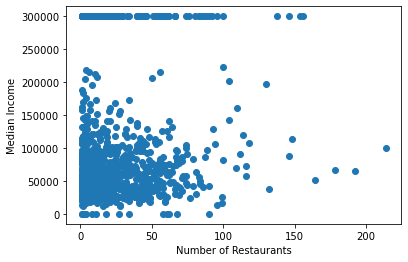

In [2]:
plt.scatter(df["count"], df["median"])
plt.xlabel('Number of Restaurants')
plt.ylabel('Median Income')
plt.show()

In [3]:
X = df["count"].values.reshape(-1, 1)

In [4]:
y = df["median"]

In [5]:
model = LinearRegression()
model.fit(X,y)

LinearRegression()

In [6]:
y_pred = model.predict(X)
print(y_pred.shape)

(945,)


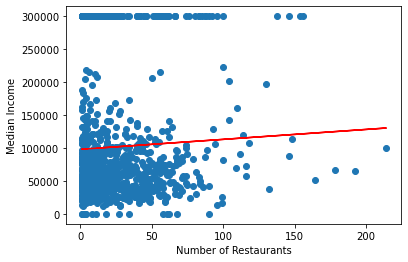

 The slope is 150.85
 The intercept is at $98,046


In [7]:
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.xlabel('Number of Restaurants')
plt.ylabel('Median Income')
plt.show()

print(f" The slope is {model.coef_[0]:.2f}")
print(f" The intercept is at ${model.intercept_:,.0f}")

#Our y=mx+b slope equation is Median Income = 98046 + 151*Number of Restaurants

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [9]:
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [10]:
from keras.models import load_model
classifier = LinearRegression()
classifier.fit(X_train,y_train)

LinearRegression()

In [22]:
y_pred = classifier.predict(X_test)
results=pd.DataFrame({"Prediction":y_pred, "Actual":y_test}).reset_index(drop=True)
pd.options.display.float_format = '{:.0f}'.format
results

,Prediction,Actual
0,103738,25700
1,113528,300000
2,100869,33741
3,107620,109102
4,101881,0
...,...,...
232,99350,300000
233,99350,35043
234,102725,65824
235,107283,55120


In [ ]:
#where our below errors stem from
print("y_pred = ", type(y_pred))
print("y_test = ",type(y_test))

In [ ]:
classifier.score(X, y)

In [ ]:
# The coefficients
print("Coefficients: \n", classifier.coef_)

In [ ]:
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.4f" % r2_score(y_test, y_pred))